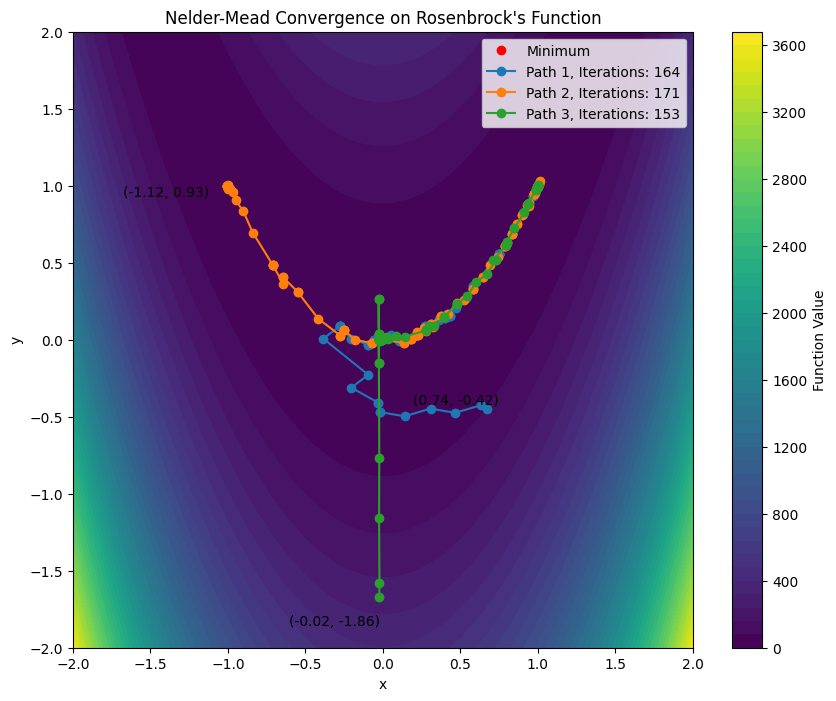

In [38]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# Define the Rosenbrock function
def rosenbrock(x):
    return 100 * (x[1] - x[0]**2)**2 + (1 - x[0])**2

# Function to execute Nelder-Mead optimization with a callback to track points
def nelder_mead(start_point):
    path = []  # To store intermediate points
    # Define the callback function to store the current point at each iteration
    def callback(xk):
        path.append(xk.copy())  # Store a copy of the current point
    # Perform Nelder-Mead optimization with the callback
    result = minimize(rosenbrock, start_point, method='Nelder-Mead', options={'xatol': 1e-3, 'fatol': 1e-3}, callback=callback)
    return result, path

# Function to plot the Nelder-Mead optimization paths
def plot_nelder_mead(paths, start_points, iterations_list):
    x_vals = np.linspace(-2, 2, 400)
    y_vals = np.linspace(-2, 2, 400)
    X, Y = np.meshgrid(x_vals, y_vals)
    Z = rosenbrock([X, Y])

    plt.figure(figsize=(10, 8))
    contour_filled = plt.contourf(X, Y, Z, levels=50, cmap="viridis")  # Correct Rosenbrock function domain
    plt.colorbar(contour_filled, label="Function Value")  # Color bar added
    plt.plot(1, 1, 'ro', label="Minimum")  # Highlight minimum (red for minimum point)

    # Plot the paths of optimization
    for i, path in enumerate(paths):
        path = np.array(path)  # Convert to array for easier indexing
        plt.plot(path[:, 0], path[:, 1], marker='o', label=f"Path {i+1}, Iterations: {iterations_list[i]}")

        # Annotate starting points with coordinate values
        plt.text(start_points[i][0], start_points[i][1], 
                 f"({start_points[i][0]:.2f}, {start_points[i][1]:.2f})",
                 fontsize=10, ha='right')
    
    plt.title(f"Nelder-Mead Convergence on Rosenbrock's Function")
    plt.xlabel('x')
    plt.ylabel('y')
    plt.xlim([-2, 2])  # Ensure correct domain
    plt.ylim([-2, 2])  # Ensure correct domain
    plt.legend()
    plt.show()

# Random initialization
start_points = [np.random.uniform(-2, 2, 2) for _ in range(3)]  # 3 random initializations

# Collect paths for each method
nm_paths = []
iterations_list = []
for start_point in start_points:
    result, path = nelder_mead(start_point)
    nm_paths.append(path)  # Store the path
    iterations_list.append(result.nfev)  # Number of function evaluations as iteration count

# Plot the Nelder-Mead results
plot_nelder_mead(nm_paths, start_points, iterations_list)


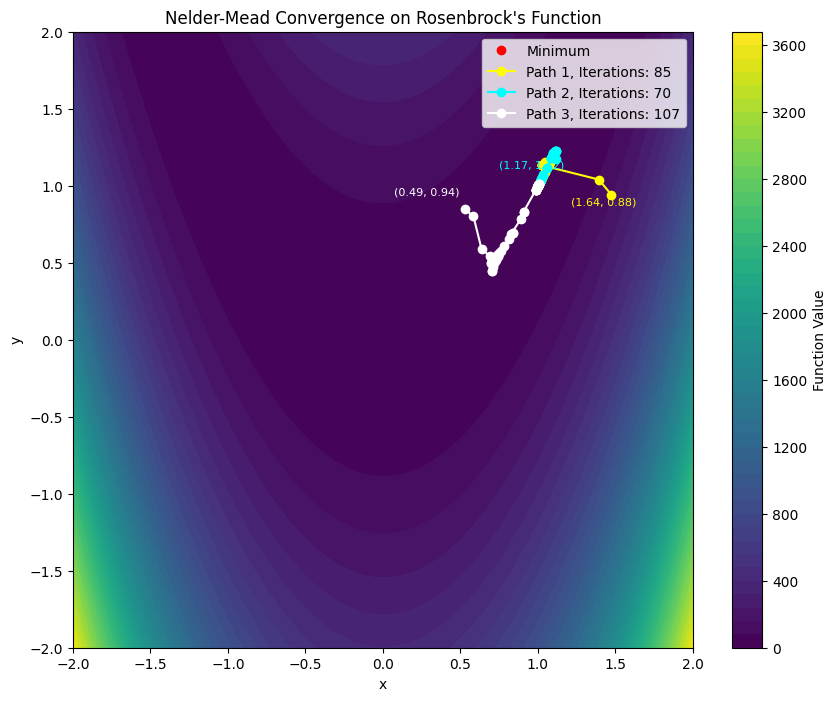

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# Define the Rosenbrock function
def rosenbrock(x):
    return 100 * (x[1] - x[0]**2)**2 + (1 - x[0])**2

# Function to execute Nelder-Mead optimization with a callback to track points
def nelder_mead(start_point):
    path = []  # To store intermediate points
    # Define the callback function to store the current point at each iteration
    def callback(xk):
        path.append(xk.copy())  # Store a copy of the current point
    # Perform Nelder-Mead optimization with the callback
    result = minimize(rosenbrock, start_point, method='Nelder-Mead', options={'xatol': 1e-3, 'fatol': 1e-3}, callback=callback)
    return result, path

# Function to plot the Nelder-Mead optimization paths
def plot_nelder_mead(paths, start_points, iterations_list, colors):
    x_vals = np.linspace(-2, 2, 400)
    y_vals = np.linspace(-2, 2, 400)
    X, Y = np.meshgrid(x_vals, y_vals)
    Z = rosenbrock([X, Y])

    plt.figure(figsize=(10, 8))
    contour_filled = plt.contourf(X, Y, Z, levels=50, cmap="viridis")  # Correct Rosenbrock function domain
    plt.colorbar(contour_filled, label="Function Value")  # Color bar added
    plt.plot(1, 1, 'ro', label="Minimum")  # Highlight minimum (red for minimum point)

    # Plot the paths of optimization
    for i, path in enumerate(paths):
        path = np.array(path)  # Convert to array for easier indexing
        plt.plot(path[:, 0], path[:, 1], marker='o', color=colors[i], label=f"Path {i+1}, Iterations: {iterations_list[i]}")

        # Annotate starting points with coordinate values and respective colors
        plt.text(start_points[i][0], start_points[i][1], 
                 f"({start_points[i][0]:.2f}, {start_points[i][1]:.2f})",
                 color=colors[i], fontsize=8, ha='right')
    
    plt.title(f"Nelder-Mead Convergence on Rosenbrock's Function")
    plt.xlabel('x')
    plt.ylabel('y')
    plt.xlim([-2, 2])  # Ensure correct domain
    plt.ylim([-2, 2])  # Ensure correct domain
    plt.legend()
    plt.show()

# Random initialization of start points
start_points = [np.random.uniform(-2, 2, 2) for _ in range(3)]  # 3 random initializations

# Assign colors for each starting point and path
colors = ['xkcd:bright yellow', 'xkcd:cyan', 'xkcd:white']

# Collect paths for each method
nm_paths = []
iterations_list = []
for start_point in start_points:
    result, path = nelder_mead(start_point)
    nm_paths.append(path)  # Store the path
    iterations_list.append(result.nfev)  # Number of function evaluations as iteration count

# Plot the Nelder-Mead results
plot_nelder_mead(nm_paths, start_points, iterations_list, colors)
